In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('clean_jobs_data_1.csv')
df.head(2)

,company_name,job_title,location,state,est_salary,min_salary,max_salary,python,spark,excel,aws,rating,sector,industry,job_age,company_age,job_description
0,Spotify,"Data Scientist, Spotify Advertising","New York, NY",NY,78000-182000,78000.0,182000.0,0,0,0,0,4.2,Information Technology,Internet & Web Services,30.0,16.0,"Data, Research & Insights\nData Science\nAt Sp..."
1,NTT DATA,Data Scientist,"Woonsocket, RI",RI,70,145600.0,145600.0,0,0,0,0,3.8,Information Technology,Information Technology Support Services,1.0,55.0,NTT Data is assisting our healthcare client se...


In [89]:
df.columns

Index(['company_name', 'job_title', 'location', 'state', 'est_salary',
       'min_salary', 'max_salary', 'python', 'spark', 'excel', 'aws', 'rating',
       'sector', 'industry', 'job_age', 'company_age', 'job_description'],
      dtype='object')

In [90]:
def simplify_job_title(job_title):
    if 'data science' in job_title.lower() or 'data scientist' in job_title.lower():
        return 'data science'
    elif 'machine learning' in job_title.lower():
        return 'ml'
    elif 'analyst' in job_title.lower():
        return 'analyst'
    elif 'data engineer' in job_title.lower():
        return 'data engineer'
    elif 'manager' in job_title.lower():
        return 'manager'
    elif 'director' in job_title.lower():
        return 'director'
    else:
        return 'na'

def seniority(job_title):
    for sen_sen in ['senior', 'sr', 'sr.']:
        if sen_sen in job_title.lower():
            return 'senior'
    for sen_jr in ['junior', 'jr', 'jr.']:
        if sen_jr in job_title.lower():
            return 'junior'
    return 'na'

In [91]:
df['simp_job_title'] = df.job_title.apply(lambda x: simplify_job_title(x))
df['seniority'] = df.job_title.apply(lambda x: seniority(x))
df['job_description'] = df.job_description.apply(lambda x: x.lower())
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [92]:
df.seniority.value_counts()

na        885
senior     67
junior     48
Name: seniority, dtype: int64

In [93]:
df.simp_job_title.value_counts()

data science     940
na                31
data engineer     28
analyst            1
Name: simp_job_title, dtype: int64

In [94]:
df.describe()

,min_salary,max_salary,python,spark,excel,aws,rating,job_age,company_age,avg_salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,975.000000,1000.00000,1000.000000
mean,95197.878880,136228.880000,0.106000,0.063000,0.041000,0.033000,3.029800,16.556923,23.69400,115713.379440
std,30489.520434,56331.778001,0.307992,0.243085,0.198389,0.178726,1.906239,11.990182,41.66798,36299.799228
min,30000.000000,2080.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.00000,48638.940000
25%,75000.000000,116000.000000,0.000000,0.000000,0.000000,0.000000,2.900000,4.500000,-1.00000,91000.000000
50%,90000.000000,135200.000000,0.000000,0.000000,0.000000,0.000000,3.900000,14.000000,4.00000,120000.000000
75%,117000.000000,168750.000000,0.000000,0.000000,0.000000,0.000000,4.200000,30.000000,23.00000,135000.000000
max,191000.000000,276000.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,220.00000,233500.000000


In [95]:
num_cols = list(df.select_dtypes(include=np.number).columns)
for i in ['aws', 'python', 'spark', 'excel']:
    num_cols.remove(i)

In [96]:
num_cols

['min_salary', 'max_salary', 'rating', 'job_age', 'company_age', 'avg_salary']

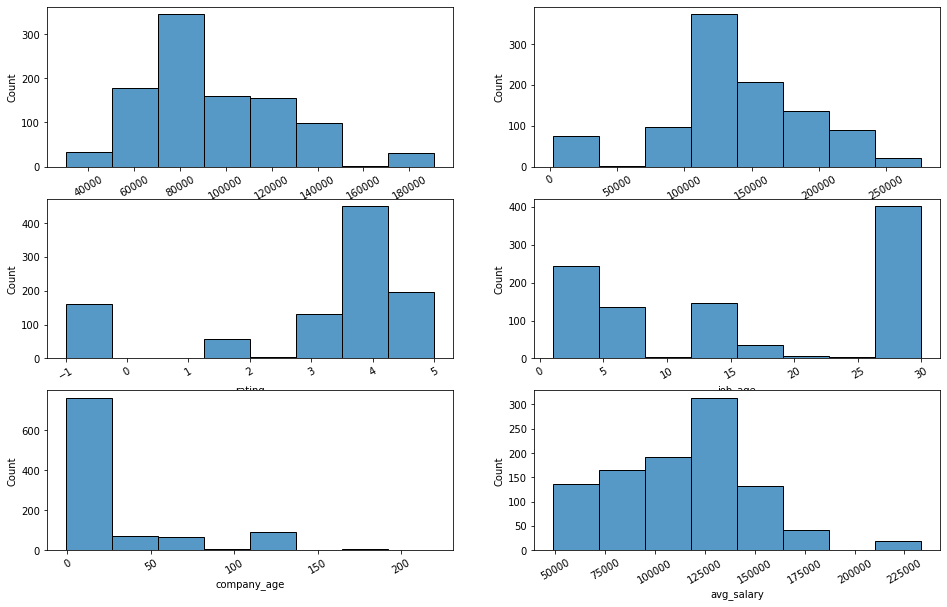

In [97]:
plt.figure(figsize=(16, 10))
for pos, col in enumerate(num_cols):
    plt.subplot(3, 2, pos+1)
    sns.histplot(df[col], bins=8)
    plt.xticks(rotation=30)

<AxesSubplot:>

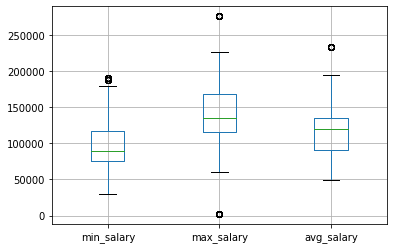

In [98]:
df.boxplot(column=['min_salary', 'max_salary', 'avg_salary'])

<AxesSubplot:>

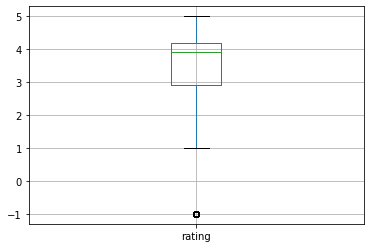

In [99]:
df.boxplot(column=['rating'])